In [1]:
# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha, s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [3]:
df = pd.read_excel('All_Data.xlsx')

In [4]:
df.head()

,Neck_Flexion_Diff_Snehpana,Neck_Extension_Diff_Snehpana,Lateral_Rotation_Right_Diff_Snehpana,Lateral_Rotation_Left_Diff_Snehpana,Lateral_Flexion_Right_Diff_Snehpana,Lateral_Flexion_Left_Diff_Snehpana,MNCV_Diff_Snehpana,SNCV_Diff_Snehpana,Prakurti,Gender,Age,Pain_Scale_Snehpana
0,36,36,14,29,23,22,3.9,30.20,4,2,45,-6
1,27,34,29,27,26,24,4.4,18.28,4,1,57,-2
2,41,36,12,24,14,18,-8.6,15.50,5,2,50,-2
3,35,12,23,21,8,22,5.9,15.10,4,2,40,-6
4,37,36,14,17,22,10,19.3,13.70,4,2,46,-3


In [29]:
df.shape

(40, 13)

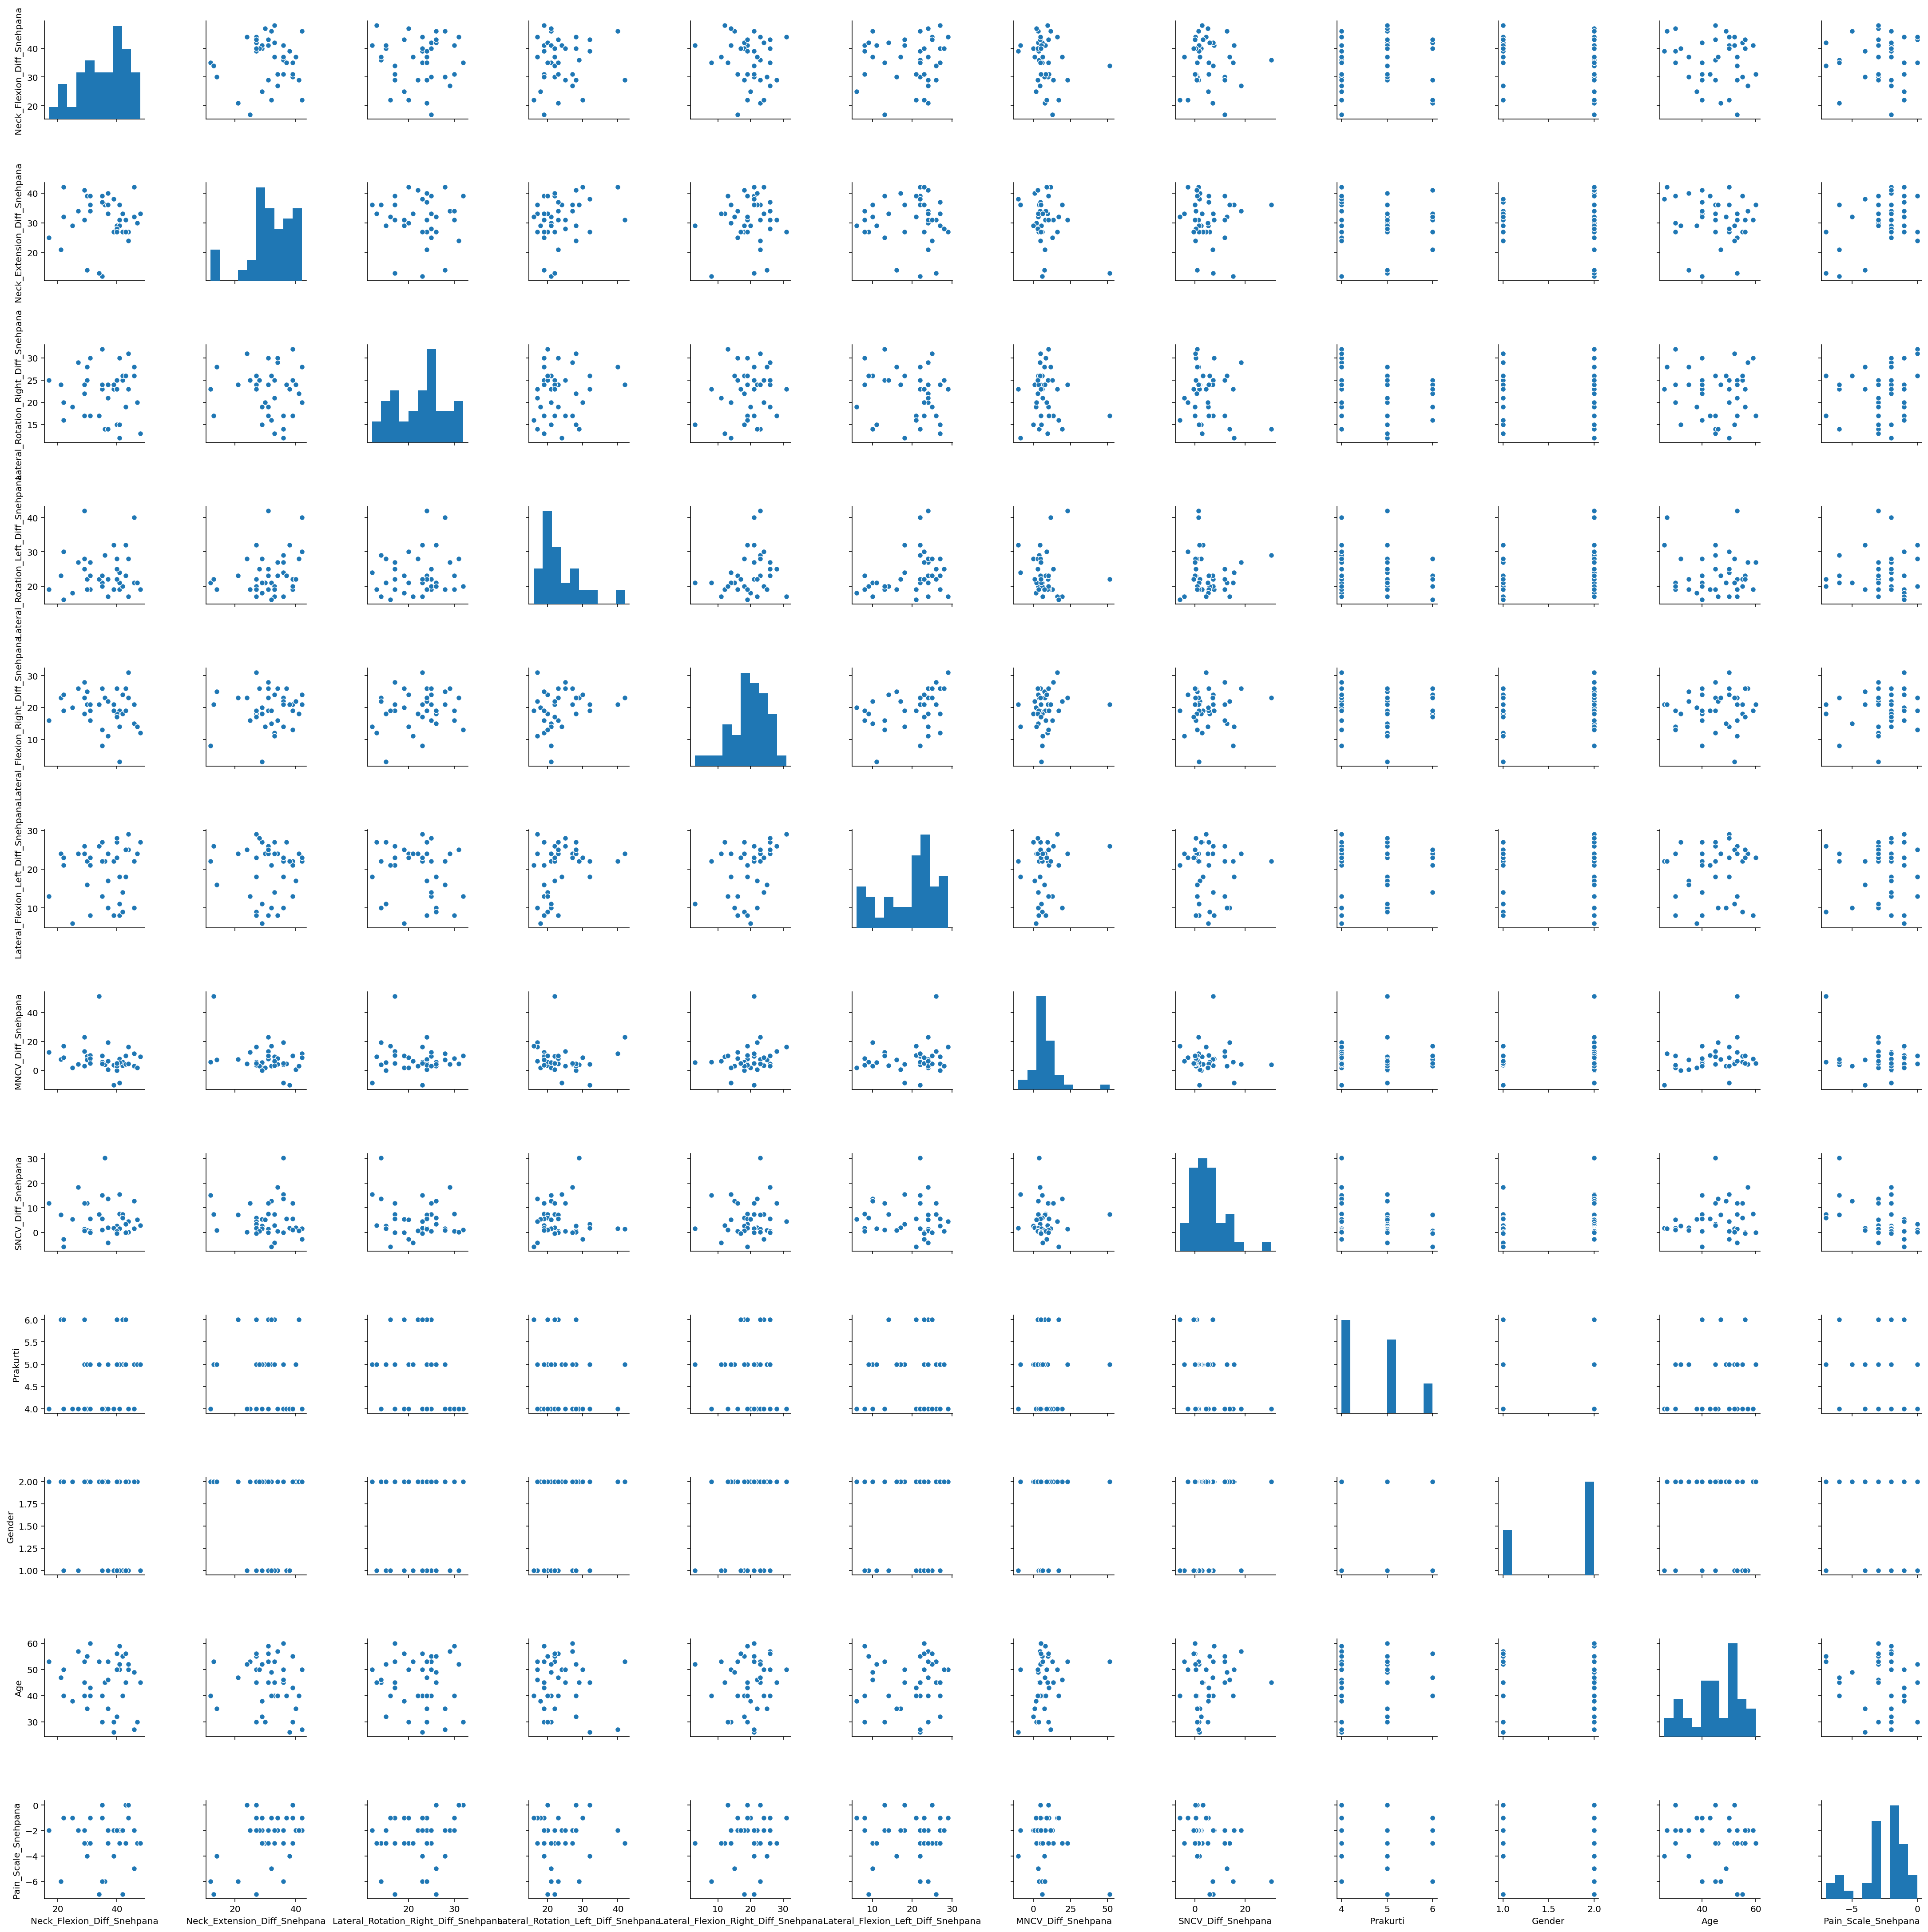

In [37]:
sns.pairplot(df)

In [5]:
df.corr()

,Neck_Flexion_Diff_Snehpana,Neck_Extension_Diff_Snehpana,Lateral_Rotation_Right_Diff_Snehpana,Lateral_Rotation_Left_Diff_Snehpana,Lateral_Flexion_Right_Diff_Snehpana,Lateral_Flexion_Left_Diff_Snehpana,MNCV_Diff_Snehpana,SNCV_Diff_Snehpana,Prakurti,Gender,Age,Pain_Scale_Snehpana
Neck_Flexion_Diff_Snehpana,1.000000,0.020936,0.009296,0.032041,-0.177892,0.032518,-0.215119,-0.035320,0.078425,-0.245836,-0.114749,-0.027437
Neck_Extension_Diff_Snehpana,0.020936,1.000000,-0.088535,0.261858,0.077808,-0.009930,-0.331219,-0.056836,-0.155281,-0.002768,-0.144144,0.434850
Lateral_Rotation_Right_Diff_Snehpana,0.009296,-0.088535,1.000000,0.136079,0.164283,-0.233949,-0.091385,-0.168102,-0.204738,-0.010653,-0.065995,0.210335
Lateral_Rotation_Left_Diff_Snehpana,0.032041,0.261858,0.136079,1.000000,0.228250,0.346390,-0.061491,-0.024373,-0.063215,0.171376,-0.088294,0.038945
Lateral_Flexion_Right_Diff_Snehpana,-0.177892,0.077808,0.164283,0.228250,1.000000,0.344822,0.166008,0.064856,-0.087463,0.098205,0.081506,0.117869
Lateral_Flexion_Left_Diff_Snehpana,0.032518,-0.009930,-0.233949,0.346390,0.344822,1.000000,0.145058,-0.093955,0.182532,-0.041967,0.100574,-0.026295
MNCV_Diff_Snehpana,-0.215119,-0.331219,-0.091385,-0.061491,0.166008,0.145058,1.000000,-0.030545,-0.001226,0.182178,0.271771,-0.232957
SNCV_Diff_Snehpana,-0.035320,-0.056836,-0.168102,-0.024373,0.064856,-0.093955,-0.030545,1.000000,-0.345743,0.266799,0.155838,-0.419501
Prakurti,0.078425,-0.155281,-0.204738,-0.063215,-0.087463,0.182532,-0.001226,-0.345743,1.000000,-0.238856,0.145129,-0.183903
Gender,-0.245836,-0.002768,-0.010653,0.171376,0.098205,-0.041967,0.182178,0.266799,-0.238856,1.000000,-0.094465,-0.043418


In [15]:
df.describe()

,Neck_Flexion_Diff_Snehpana,Neck_Extension_Diff_Snehpana,Lateral_Rotation_Right_Diff_Snehpana,Lateral_Rotation_Left_Diff_Snehpana,Lateral_Flexion_Right_Diff_Snehpana,Lateral_Flexion_Left_Diff_Snehpana,MNCV_Diff_Snehpana,SNCV_Diff_Snehpana,Prakurti,Gender,Age,Pain_Scale_Snehpana
count,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,35.650000,31.12500,22.150000,23.500000,19.62500,19.600000,7.778500,5.294250,4.675000,1.675000,45.050000,-2.650000
std,7.816977,7.32466,5.327962,5.835348,5.57323,6.697876,9.441826,6.903981,0.729858,0.474342,9.356062,1.805263
min,17.000000,12.00000,12.000000,16.000000,3.00000,6.000000,-10.200000,-5.900000,4.000000,1.000000,26.000000,-7.000000
25%,30.000000,27.00000,17.000000,19.000000,16.75000,13.750000,3.525000,0.850000,4.000000,1.000000,40.000000,-3.000000
50%,37.000000,31.50000,23.000000,22.000000,20.50000,22.000000,5.900000,3.090000,5.000000,2.000000,45.500000,-2.000000
75%,41.250000,36.00000,25.250000,27.000000,23.00000,24.000000,10.050000,7.370000,5.000000,2.000000,53.000000,-1.750000
max,48.000000,42.00000,32.000000,42.000000,31.00000,29.000000,51.300000,30.200000,6.000000,2.000000,60.000000,0.000000


In [17]:
from sklearn.preprocessing import StandardScaler

X = df.values[:, :]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.04534474,  0.67403873, -1.54915252,  0.95453893,  0.613288  ,
         0.36288737, -0.41601166,  3.65340426, -0.93661962,  0.69388867,
        -0.00541221, -1.87932559],
       [-1.12066284,  0.39751002,  1.30204844,  0.60743387,  1.1584329 ,
         0.66529351, -0.36238118,  1.90486913, -0.93661962, -1.44115338,
         1.29351808,  0.36464526],
       [ 0.69312673,  0.67403873, -1.92931265,  0.08677627, -1.02214667,
        -0.24192491, -1.75677375,  1.49707319,  0.450965  ,  0.69388867,
         0.53580874,  0.36464526],
       [-0.08421166, -2.6443058 ,  0.16156805, -0.43388133, -2.11243646,
         0.36288737, -0.20148973,  1.43839751, -0.93661962,  0.69388867,
        -0.54663316, -1.87932559],
       [ 0.17490114,  0.67403873, -1.54915252, -1.12809147,  0.43157304,
        -1.45154948,  1.23580723,  1.23303265, -0.93661962,  0.69388867,
         0.10283198, -0.19634745],
       [ 1.34090871,  0.12098131,  0.73180825, -0.43388133, -0.84043171,
        -1.45154948, -

In [19]:
num_clusters = 3
km = KMeans(init = "k-means++", n_clusters=num_clusters, random_state=20, n_init=12) # n_init, number of times the K-mean algorithm will run
km.fit(df)
#display_cluster(df, km, num_clusters)
labels = km.labels_
print(labels)

[1 1 2 2 1 2 1 1 1 2 1 0 1 2 0 1 0 0 2 2 2 0 0 0 0 2 0 1 0 0 0 0 2 2 1 2 2
 1 2 1]


In [20]:
df["Clus_km"] = labels
df.head()

,Neck_Flexion_Diff_Snehpana,Neck_Extension_Diff_Snehpana,Lateral_Rotation_Right_Diff_Snehpana,Lateral_Rotation_Left_Diff_Snehpana,Lateral_Flexion_Right_Diff_Snehpana,Lateral_Flexion_Left_Diff_Snehpana,MNCV_Diff_Snehpana,SNCV_Diff_Snehpana,Prakurti,Gender,Age,Pain_Scale_Snehpana,Clus_km
0,36,36,14,29,23,22,3.9,30.20,4,2,45,-6,1
1,27,34,29,27,26,24,4.4,18.28,4,1,57,-2,1
2,41,36,12,24,14,18,-8.6,15.50,5,2,50,-2,2
3,35,12,23,21,8,22,5.9,15.10,4,2,40,-6,2
4,37,36,14,17,22,10,19.3,13.70,4,2,46,-3,1


In [21]:
df.groupby('Clus_km').mean()

,Neck_Flexion_Diff_Snehpana,Neck_Extension_Diff_Snehpana,Lateral_Rotation_Right_Diff_Snehpana,Lateral_Rotation_Left_Diff_Snehpana,Lateral_Flexion_Right_Diff_Snehpana,Lateral_Flexion_Left_Diff_Snehpana,MNCV_Diff_Snehpana,SNCV_Diff_Snehpana,Prakurti,Gender,Age,Pain_Scale_Snehpana
Clus_km,,,,,,,,,,,,
0,36.538462,33.307692,24.153846,24.076923,19.769231,17.538462,3.522308,2.776923,4.615385,1.692308,34.076923,-2.000000
1,28.153846,31.923077,19.923077,24.461538,22.000000,21.461538,14.343846,8.507692,4.538462,1.846154,49.769231,-3.153846
2,41.785714,28.357143,22.357143,22.071429,17.285714,19.785714,5.634286,4.647857,4.857143,1.500000,50.857143,-2.785714


C:\Users\rohit\AppData\Local\Temp/ipykernel_5716/1201868288.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 10], X[:, 8], s=area, c=labels.astype(np.float), alpha=0.5)


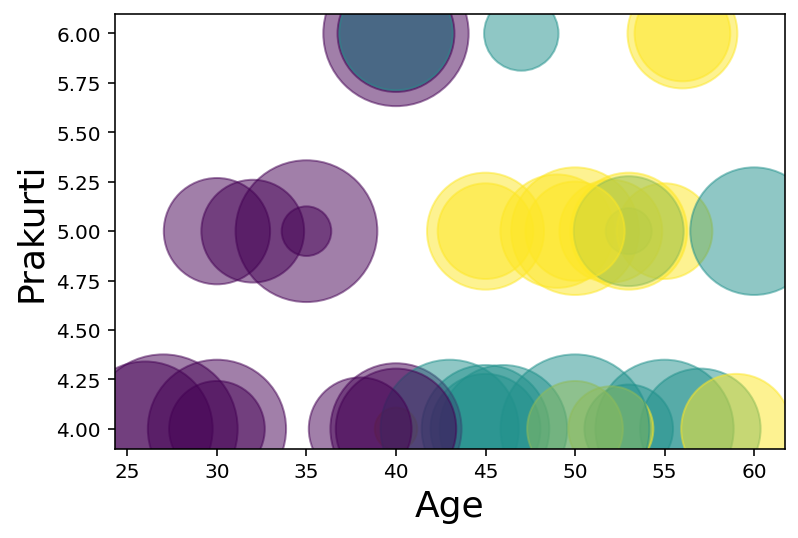

In [25]:
#area = np.pi * (X[:,1])**2
plt.scatter(X[:, 10], X[:, 8], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Prakurti', fontsize=18)

plt.show()

C:\Users\rohit\AppData\Local\Temp/ipykernel_5716/2247986448.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\rohit\AppData\Local\Temp/ipykernel_5716/2247986448.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 8], X[:, 10], X[:, 0], c= labels.astype(np.float))


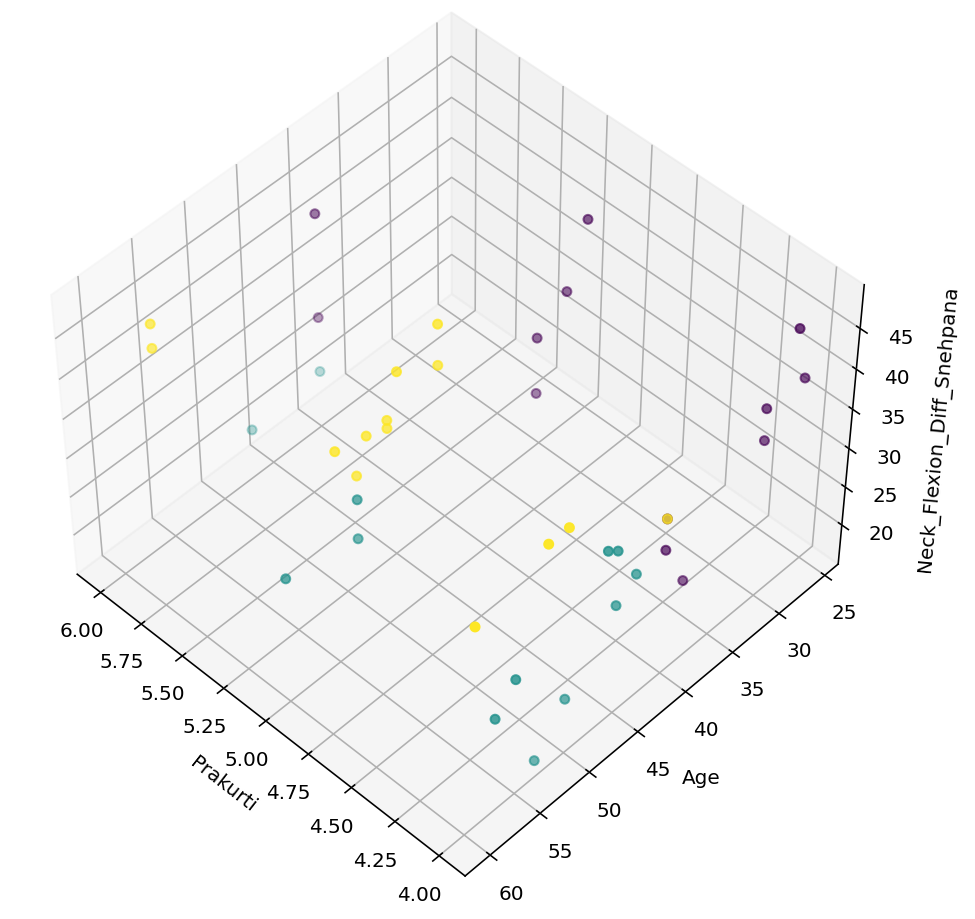

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Prakurti')
ax.set_ylabel('Age')
ax.set_zlabel('Neck_Flexion_Diff_Snehpana')

ax.scatter(X[:, 8], X[:, 10], X[:, 0], c= labels.astype(np.float))
